# xgboost

- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
- XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결함
- 병렬 GPU 환경에서 빠르게 학습 가능

In [20]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBRFClassifier,XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
 

In [2]:
# 파이썬 기반 xgboost : 기존 xgboost는 c언어로 작성이 되어 있다. 
# 파이썬 기반의 xgboost는 고유의 DMatrix라는 구조(클래스)를 가지고 있다.  
cancer = load_breast_cancer()

x_train,x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(data=x_train, label=y_train) 
dtest = xgb.DMatrix(data= x_test, label = y_test)

In [3]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective' : 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping': 100,
}
num_rounds = 400

In [4]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain = dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds= 50, evals = evals ) 

[15:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60961	eval-logloss:0.61443
[1]	train-logloss:0.54076	eval-logloss:0.54721
[2]	train-logloss:0.48407	eval-logloss:0.49559
[3]	train-logloss:0.43324	eval-logloss:0.44659
[4]	train-logloss:0.38985	eval-logloss:0.40682
[5]	train-logloss:0.35213	eval-logloss:0.37082
[6]	train-logloss:0.31949	eval-logloss:0.34032
[7]	train-logloss:0.29139	eval-logloss:0.31559
[8]	train-logloss:0.26606	eval-logloss:0.29181
[9]	train-logloss:0.24392	eval-logloss:0.27323
[10]	train-logloss:0.22408	eval-logloss:0.25490
[11]	train-logloss:0.20697	eval-logloss:0.24217
[12]	train-

In [5]:
import numpy as np
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[0.992 0.001 0.001 0.999 1.    0.001 0.001 0.082 0.257 0.998]


In [6]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [7]:
print('정확도 : {}'.format(accuracy_score(y_test,preds)))
print('정밀도 : {}'.format(precision_score(y_test,preds)))
print('재현률 : {}'.format(recall_score(y_test,preds)))


정확도 : 0.9649122807017544
정밀도 : 0.958904109589041
재현률 : 0.9859154929577465


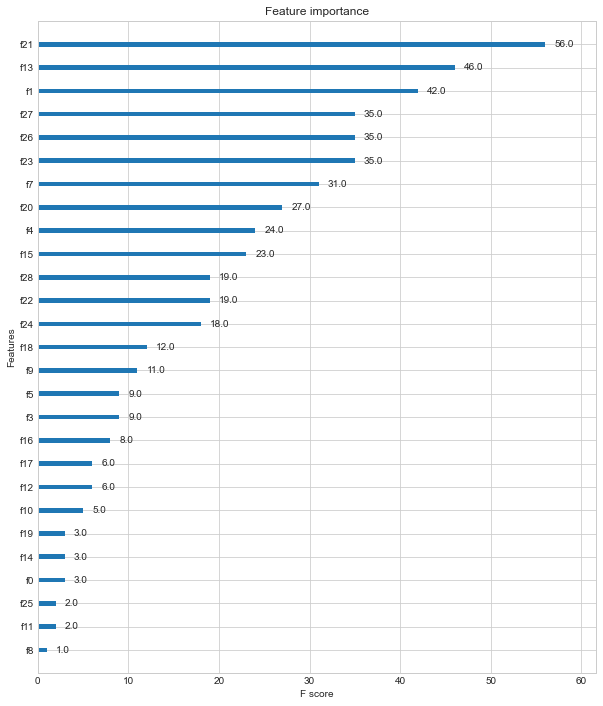

In [8]:
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax);

In [ ]:
# xgboost 는 트리 기반이기 때문에 트리를 보여줄 수 있다. 
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

In [10]:
# xgbclassifier 사이킷 런에서 호환된 xgboost

iris = load_iris()
x_train,x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [11]:
xgbc = XGBClassifier(n_estimators =400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(x_train, y_train)
preds = xgbc.predict(x_test)
preds_proba = xgbc.predict_proba(x_test)[:,1]


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
cross_val = cross_validate(
    estimator = xgbc,
    X=iris.data, y=iris.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
avg fit time: 0.29959888458251954 (+/- 0.009965457902497046)
avg score time: 0.003590297698974609 (+/- 0.0004888697566418616)
avg test score: 0.96 (+/- 0.024944382578492935)


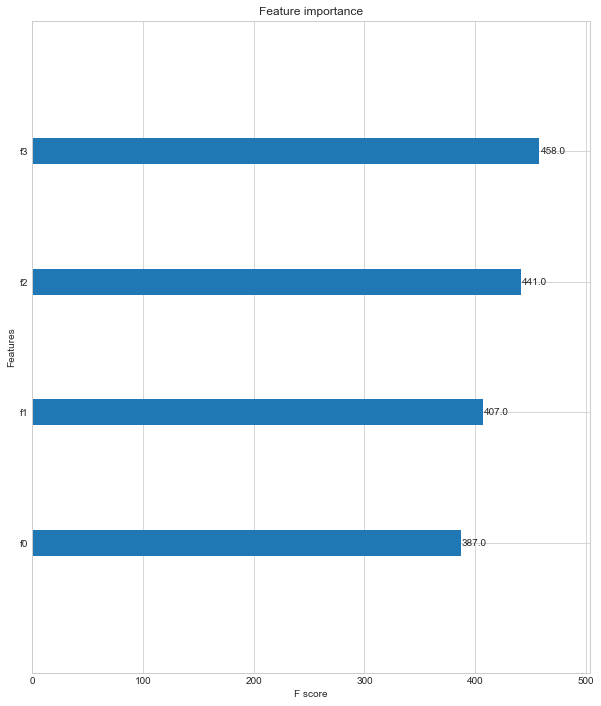

In [14]:
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgbc, ax=ax);

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
print(graph)

In [24]:
# xgbregressor  >> 보스턴

boston = load_boston()
x_train,x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

C:\ProgramData\Anaconda3\envs\tf270gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [27]:
xgbr = XGBRegressor(n_estimators =400, learning_rate = 0.1, max_depth = 3, objective='reg:squarederror')
xgbr.fit(x_train, y_train)
preds = xgbr.predict(x_test)



In [28]:
cross_val = cross_validate(
    estimator = xgbr,
    X=boston.data, y=boston.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.24534382820129394 (+/- 0.004323760201807227)
avg score time: 0.004987049102783203 (+/- 3.1629798797182086e-07)
avg test score: 0.6884390736705599 (+/- 0.1649974770303876)


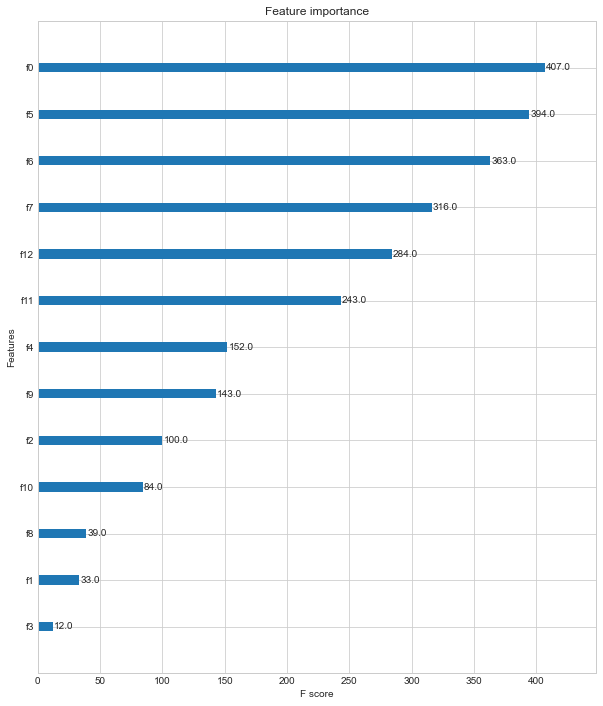

In [30]:
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgbr, ax=ax);

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph